# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 40.2 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080017 sha256=58398167e67e72b2ea8f76955c1d70d51d6ac3511a56c0961142aa917e636a8d
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.3
    Uninstalling bokeh-3.4.3:
      Successfully uninstalled bokeh-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.19.1 requires bokeh>=

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "logatchi"
kaggle_key = "c431d971628b53deaa6b821048d22387"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 48.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
label = 'count'
ignore_columns = ['casual', 'registered']
eval_metric = 'root_mean_squared_error'
time_limit = 600
preset = 'best_quality'

In [12]:
predictor = TabularPredictor(label=label,problem_type= 'regression',eval_metric=eval_metric,learner_kwargs={'ignored_columns': ignore_columns})
predictor.fit(train,time_limit=time_limit,presets=preset)

No path specified. Models will be saved in: "AutogluonModels/ag-20241021_181236"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.26 GB / 12.67 GB (88.8%)
Disk Space Avail:   69.01 GB / 107.72 GB (64.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=5591) [1000]	valid_set's rmse: 130.657


(_ray_fit pid=5702) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=5702) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5702)  [repeated 4x across cluster]
(_ray_fit pid=5702) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5702) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5702)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=5744) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5744) Dask dataframe query planning is disabled because dask-expr is not

(_ray_fit pid=5744) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster]
(_ray_fit pid=5788) [3000]	valid_set's rmse: 126.147 [repeated 3x across cluster]


(_ray_fit pid=5854)  [repeated 4x across cluster]
(_ray_fit pid=5854) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5854) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5854) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5854) This will raise in a future version.
(_ray_fit pid=5854)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=5854) [1000]	valid_set's rmse: 135.845 [repeated 2x across cluster]
(_ray_fit pid=5854) [4000]	valid_set's rmse: 133.013 [repeated 6x across cluster]
(_ray_fit pid=5854) [8000]	valid_set's rmse: 132.379 [repeated 4x across cluster]


(_ray_fit pid=5974) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5974) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5974) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5974) This will raise in a future version.
(_ray_fit pid=5974)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=5974)  [repeated 2x across cluster]


(_ray_fit pid=5974) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=5974) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=5974) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=5974) [4000]	valid_set's rmse: 135.344


(_ray_fit pid=6042) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6042) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6042) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6042) This will raise in a future version.
(_ray_fit pid=6042)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=6042)  [repeated 2x across cluster]


(_ray_fit pid=5974) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=6042) [1000]	valid_set's rmse: 139.958
(_ray_fit pid=5974) [8000]	valid_set's rmse: 135.261 [repeated 5x across cluster]


(_dystack pid=5426) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5426) 	79.39s	 = Training   runtime
(_dystack pid=5426) 	11.18s	 = Validation runtime
(_dystack pid=5426) Fitting model: LightGBM_BAG_L1 ... Training model for up to 5.22s of the 52.3s of remaining time.
(_dystack pid=5426) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
(_ray_fit pid=6153) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6153) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6153) 
(_ray_fit pid=6153) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6153) This will raise in a future version.
(_ray_fit pid=6153) 
(_ray_fit pid=6153)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=6241) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42:

(_ray_fit pid=6497) [1000]	valid_set's rmse: 70.098 [repeated 3x across cluster]


(_ray_fit pid=6596) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6596) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6596)  [repeated 4x across cluster]
(_ray_fit pid=6596) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6596) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6596)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6596) [1000]	valid_set's rmse: 77.8517 [repeated 2x across cluster]


(_ray_fit pid=6696) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6696) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6696)  [repeated 4x across cluster]
(_ray_fit pid=6696) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6696) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6696)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6696) [1000]	valid_set's rmse: 75.5456
(_ray_fit pid=6730) [1000]	valid_set's rmse: 77.6879


(_ray_fit pid=6793) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6793) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6793)  [repeated 4x across cluster]
(_ray_fit pid=6793) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6793) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6793)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6793) [1000]	valid_set's rmse: 75.3612
(_ray_fit pid=6792) [1000]	valid_set's rmse: 72.0313


(_dystack pid=5426) 	-74.1302	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5426) 	39.85s	 = Training   runtime
(_dystack pid=5426) 	2.13s	 = Validation runtime
(_ray_fit pid=6792) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6792) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6792)  [repeated 2x across cluster]
(_ray_fit pid=6792) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6792) This will raise in a future version.
(_ray_fit pid=6792)   warnings.warn(msg, FutureWarning)
(_dystack pid=5426) Fitting model: WeightedEnsemble_L3 ... Training model for up to 141.2s of the -25.65s of remaining time.
(_dystack pid=5426) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=5426) 	-74.1073	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5426) 	0.05s	 = Training   runtime
(_dy

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.182348  root_mean_squared_error      30.287725  410.595778                0.000773           0.043684            3       True         12
1   RandomForestMSE_BAG_L2  -53.490001  root_mean_squared_error      23.790689  305.297215                0.716128          47.717319            2       True         11
2          LightGBM_BAG_L2  -55.184670  root_mean_squared_error      23.460560  289.543103                0.385999          31.963207            2       True         10
3        LightGBMXT_BAG_L2  -60.599820  root_mean_squared_error      29.184825  330.871568                6.110264          73.291673            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.061499    0.051507   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.9744323903546,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,count
0,22.994289
1,42.455727
2,45.636318
3,48.727928
4,51.644943


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.473213
std,89.871544
min,3.010946
25%,20.117504
50%,63.970924
75%,167.937973
max,369.849365


In [17]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()

print("total pred:", len(predictions.index))
print("Total negative values :", pred_neg_count)

total pred: 6493
Total negative values : 0


In [18]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.05MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-10-21 18:30:32  first raw submission  complete  1.80473      1.80473       


#### Initial score of `1.80473`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

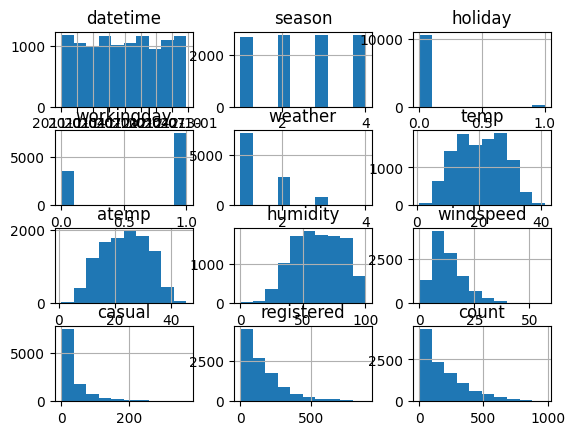

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [23]:
# create a new feature
# Function to extract time-related features from the datetime column
def extract_time_features(df):
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["dayofweek"] = df["datetime"].dt.dayofweek
    df["hour"] = df["datetime"].dt.hour
    df.drop(["datetime"], axis=1, inplace=True)
    return df

# Apply the function to both train and test datasets
train = extract_time_features(train)
test = extract_time_features(test)

# Display the first few rows of each dataset
train.head(), test.head()


(   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
 0       1        0           0        1  9.84  14.395        81        0.0   
 1       1        0           0        1  9.02  13.635        80        0.0   
 2       1        0           0        1  9.02  13.635        80        0.0   
 3       1        0           0        1  9.84  14.395        75        0.0   
 4       1        0           0        1  9.84  14.395        75        0.0   
 
    casual  registered  count  year  month  dayofweek  hour  
 0       3          13     16  2011      1          5     0  
 1       8          32     40  2011      1          5     1  
 2       5          27     32  2011      1          5     2  
 3       3          10     13  2011      1          5     3  
 4       0           1      1  2011      1          5     4  ,
    season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
 0       1        0           1        1  10.66  11.365        56    26

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [25]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'dayofweek'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

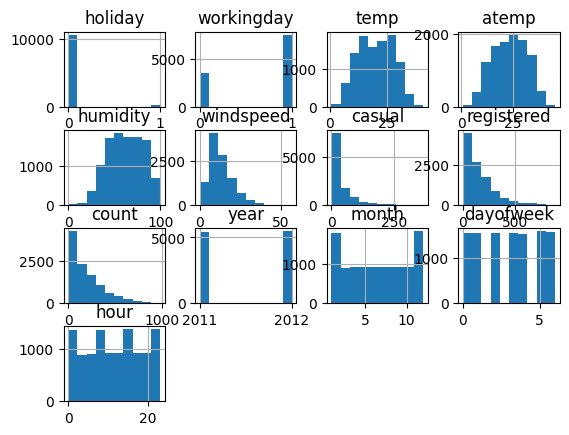

In [26]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [29]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignore_columns = ["casual", "registered"]
time_limit = 600
preset = "best_quality"

In [32]:
predictor_new_features =TabularPredictor(label=label,problem_type= 'regression',eval_metric=eval_metric,learner_kwargs={'ignored_columns': ignore_columns})
predictor_new_features.fit(train,time_limit=time_limit,presets=preset)

No path specified. Models will be saved in: "AutogluonModels/ag-20241021_183553"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.84 GB / 12.67 GB (77.6%)
Disk Space Avail:   68.02 GB / 107.72 GB (63.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [33]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.053362  root_mean_squared_error      38.287357  357.526593                0.001099           0.071340            3       True         12
1      WeightedEnsemble_L2  -34.337200  root_mean_squared_error      36.484144  256.690392                0.000928           0.027857            2       True          7
2          LightGBM_BAG_L2  -34.535463  root_mean_squared_error      37.442245  282.796399                0.271317          25.854396            2       True          9
3          CatBoost_BAG_L2  -34.640262  root_mean_squared_error      37.290365  287.480795                0.119437          30.538792            2       True         11
4   RandomForestMSE_BAG_L2  -34.793901  root_mean_squared_error      37.895504  301.062064   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.587440921643605,
  'CatBoost_BAG_L1': -38.07371419252323,
  'WeightedEnsemble_L2': -34.337200481852975,
  'LightGBMXT_BAG_L

In [35]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

,count
0,13.042274
1,6.042850
2,4.285099
3,3.520854
4,3.402598


In [36]:
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(" negative values :", pred_neg_count)

 negative values : 10


In [37]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [39]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [40]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.03MB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-10-21 18:55:09  new features          complete  0.47013      0.47013       
submission.csv               2024-10-21 18:30:32  first raw submission  complete  1.80473      1.80473       


#### New Score of `0.47013`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [43]:
import autogluon.common as ag
from autogluon.tabular import TabularPredictor

# Define hyperparameters for Random Forest with modified values
rf_options = {
    'n_estimators': 150,
    'max_features': ag.space.Real(0.2, 0.8),
    'min_samples_leaf': ag.space.Int(2, 8),
}

# Define hyperparameters for LightGBM with modified values
gbm_options = {
    'num_boost_round': 120,
    'num_leaves': ag.space.Int(30, 70, default=40),
}

# Combine the hyperparameters
hyperparameters = {
    'GBM': gbm_options,
    'RF': rf_options,
}

# Define hyperparameter tuning strategy
hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'auto',
}

# Train the model with specified settings
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241021_190148"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.77 GB / 12.67 GB (77.1%)
Disk Space Avail:   67.34 GB / 107.72 GB (62.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [48]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3  -36.542715  root_mean_squared_error      12.939391  398.172561                0.001121           0.069561            3       True         52
1    RandomForest_BAG_L2/T2  -36.754909  root_mean_squared_error      11.936951  289.112107                0.487311          37.581368            2       True         50
2    RandomForest_BAG_L2/T3  -36.815442  root_mean_squared_error      11.795515  303.167421                0.345875          51.636682            2       True         51
3    RandomForest_BAG_L2/T1  -36.894483  root_mean_squared_error      11.895934  270.812723                0.446294          19.281984            2       True         49
4        LightGBM_BAG_L2/T1  -37.179824  root_mean_squared_error      11.658791  289.602

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T5': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T6': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T7': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T8': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T9': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T10': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T11': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T12': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T13': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T14': 'StackerEnsembleModel_RF',
  

In [49]:
# Remember to set all negative values to zero
predictor = predictor.predict(test)
predictor[predictor<0] = 0

In [50]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = predictor
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 992kB/s]
Successfully submitted to Bike Sharing Demand

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-10-21 19:18:14  new features with hyperparameters  complete  0.44976      0.44976       
submission_new_features.csv  2024-10-21 18:55:09  new features                       complete  0.47013      0.47013       
submission.csv               2024-10-21 18:30:32  first raw submission               complete  1.80473      1.80473       


#### New Score of `0.44976`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

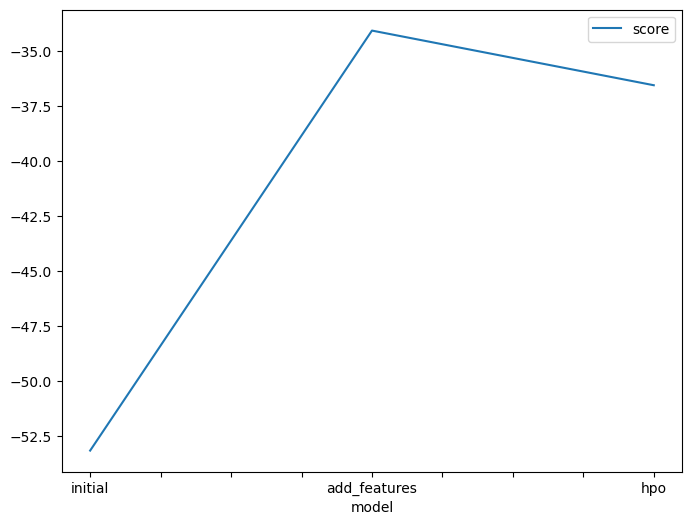

In [53]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.182348,-34.053362, -36.542715]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

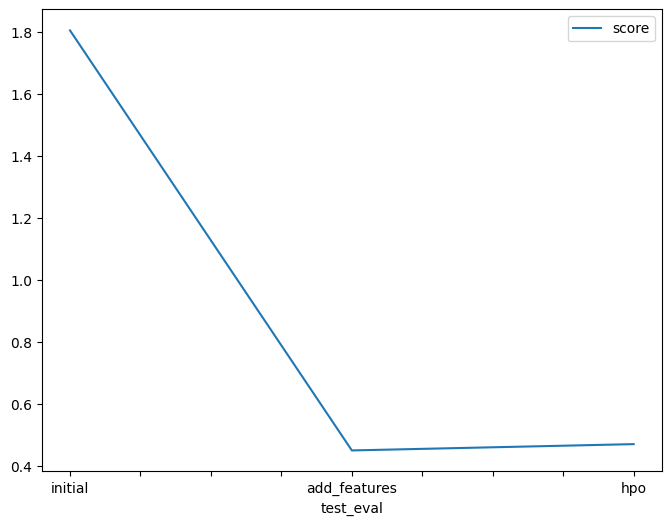

In [54]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80473, 0.44976 , 0.47013]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [56]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default_values", "default_values", "GBM"],
    "hpo2": ["default_values", "default_values", "RF"],
    "hpo3": ["standard", "standard", "optimized_deployment"],
    "score": [1.80473, 0.44976 , 0.47013]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default_values,default_values,standard,1.80473
1,add_features,default_values,default_values,standard,0.44976
2,hpo,GBM,RF,optimized_deployment,0.47013
